# Homework 2 (HW2)

By the end of this homework, we expect you to be able to:

- Preprocess data and make it amenable to statistical analysis and machine learning models;
- Train and test out-of-the-box machine learning models in `sklearn`;
- Carry out simple multivariate regression analyses using `statsmodels`;
- Use propensity score matching to estimate treatment effects;

---

## Important Dates

- Homework release: Fri 15 Nov 2024
- **Homework due**: Fri 29 Nov 2024, 23:59
- Grade release: Mon 09 Dec 2024

---

##  Some rules

1. You are allowed to use any built-in Python library that is included in the `requirements.txt` for this homework. If you use any additional library, this may complicate the grading process, and we reserve the right to penalize your grade for unnecessary complexity of the solution. All the questions can be solved with the libraries in `requirements.txt`.
2. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the *master/main* branch. If there are multiple notebooks present, we will **not grade** anything.
3. We will **not run your notebook for you**! Rather, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. Thus, be sure to hand in a **fully-run and evaluated notebook**. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
4. In continuation to the previous point on additional library, interactive plots, such as those generated using `plotly`, should be **strictly avoided**!

**A Note on using Language Models (LMs)**

If you try hard enough, you will likely get away with cheating. Fortunately, our job is not to police, but rather to educate! So, please consider the following:

Presumably, you are taking this course to learn something! LMs are not always right ([they often fail in silly ways](https://community.openai.com/t/why-9-11-is-larger-than-9-9-incredible/869824/4)). This course should prepare you to detect when they are wrong!
Some of the TAs on this course literally published many works on detecting machine-generated text.

Here LLM includes but not limited to chatbots like ChatGPT, coding assistants like Copilot. Do not even use them to prettify your code or correct English. If you are caught using LLMs, you will be reported to the instructor and subject to the consequences. 


---


## Grading 
- The homework has a total of 100 points, distributed as follows:
    - Part 1: Data Preprocessing ( 20 points)
    - Part 2: Linear Regression (30 points)
    - Part 3: Supervised Learning (40 points)
    - Part 4: Propensity Score Matching (10 points)

## Context

Within EPFL's master program, you are excited to start an internship as a data scientist.
After rounds of interviews, you have been selected to work with the biggest car dealership in Switzerland !

Your mentor at the company Tim, has explained to you that the company is interested in a pricing model for used cars. 

- Tim: "We have a lot of used cars in our inventory, and we need to determine the price at which we should sell these cars. We have some ideas about the factors that influence the price of a used car, but so far we have just been using our experience and intuition to determine the price of a used car. Sometimes it works, but probably we can do better and a more data-driven approach would also help our new employees in the sales team as they have less experience."

- You: "That sounds like a great project! What kind of data do we have?"

- Tim: "We sell all kinds of cars here, but maybe we can start with a specific brand and model. For example, the Toyota Corolla is the best-selling car worldwide in 2023, and we have a lot of data on it. We can start by analyzing the data on used Toyota Corolla cars. If it works well, we can extend the analysis to other brands."

The dataset contains the following columns:

- `Age`: Age of the car in months.
- `Mileage`: Number of distance the car has been driven. (km or miles)
- `FuelType`: Fuel type of the car (Petrol, Diesel, or CNG)
- `HP`: Horsepower
- `MetColor`: Is the color of the car metallic? (Yes=1, No=0)
- `Automatic`: Is the car automatic? (Yes=1, No=0)
- `CC`: Cylinder volume in cubic centimeters
- `Doors`: Number of doors
- `Weight`: Weight of the car in kilograms
- `Price`: Price of the car in euros


## Data

The data is provided in the `data` folder and it contains the following 3 csv files:
- `Task1-2.ToyotaCorolla-clean.csv` and `Task1-2.ToyotaCorolla-raw.csv` for Part 1 and Part 2
- `Task3.ToyotaCorolla_sales_3months.csv` for Part 3
- `Task4.ToyotaCorolla_discount_sales` for Part 4

You should not use any other data source for this homework.

## References:

The data is based on the ToyotaCorolla dataset from the UCI Machine Learning Repository [here](https://archive.ics.uci.edu/ml/datasets/Toyota+Corolla).
We have made some modifications to the original dataset, so please use the data provided in the `data` folder in the course repo.

## Task 1 (20 pts) - Get to know the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import random
import sklearn

# fix random seed for reproducibility
np.random.seed(42)
random.seed(42)





**1.1 (2 pts)**: Load the data from the file `Task1-2.ToyotaCorolla-raw.csv` into a pandas DataFrame. Display the first 5 rows of the DataFrame. Hint: A naive loading of the data will raise an error. You will need to figure out how to load the data correctly. (Hint: localise which row is causing the error)

In [2]:
# the path to the file we're interested in
file_path = 'data/Task1-2.ToyotaCorolla-raw.csv'

# we try to load the data expliciting the error
try:
    data_raw = pd.read_csv(file_path)
except Exception as e:
    print(f"Error loading the file: {e}")

Error loading the file: Error tokenizing data. C error: Expected 11 fields in line 33, saw 12



#### Comments :

We observe that in that line the price seems split into two columns, the 'Price' one and the 'Age' one, and so all other values are badly shifted to the right to the wrong columns (see code above)

In [3]:
# Initialize a list to store all lines
all_lines = []

# Read the file line by line
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        all_lines.append(line.strip())

# Display line 33 to inspect the issue
problematic_line = all_lines[32]  # Zero-based indexing
print("Problematic Line (Line 33):")
print(problematic_line)

Problematic Line (Line 33):
15,646.9,22,21862.732919254657,Petrol,97,1,0,1400,3,1100,GBP


In [4]:
def process_bad_lines(line):
        return [line[0]+line[1]]+line[2:]
    
df_raw = pd.read_csv("data/Task1-2.ToyotaCorolla-raw.csv", on_bad_lines=process_bad_lines, engine='python')

df_raw.head(5)

,Price,Age,Mileage,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Currency
0,13500.0,23.0,46986.0,Diesel,90.0,1.0,0.0,2000.0,3.0,1165.0,EURO
1,11878.0,23.0,72937.0,Diesel,90.0,1.0,0.0,2000.0,3.0,1165.0,CHF
2,12050.0,24.0,41711.0,Diesel,90.0,1.0,0.0,2000.0,3.0,1165.0,CHF
3,12914.0,26.0,48000.0,Diesel,90.0,0.0,0.0,2000.0,3.0,1165.0,CHF
4,11878.0,30.0,38500.0,Diesel,90.0,0.0,0.0,2000.0,3.0,1170.0,CHF


**1.2 (2 pts)**: Check if there are nan values in the Dataframe. If there are, try to find out which row is problematic and fix it. If you can't fix it, drop the row.

In [5]:
# Get the all the indexes with nans and their index
nan_rows = df_raw[df_raw.isna().any(axis=1)].index
print(f"Found {len(nan_rows)} row(s) with NaNs")
# There is only one problematic row, let's see what it looks like
df_raw.iloc[nan_rows]

Found 1 row(s) with NaNs


,Price,Age,Mileage,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Currency
906,8423.0;68;58860.0;Petrol;110;1;0;1600;3;1055;CHF,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,None


In [6]:
# All the elements of the problematic row are joined with semicolon in the Price column. Let's fix this
fixed_row_list = df_raw.iloc[nan_rows].values[0][0].split(";")
# Age, HP, MeColor, Automatic, CC, Doors and Weight are floats so we need to convert them
indices_to_convert = [1,4,5,6,7,8,9]
for i in indices_to_convert:
    fixed_row_list[i] = float(fixed_row_list[i])
    
df_raw.iloc[nan_rows] = fixed_row_list

print(df_raw.loc[906])

Price         8423.0
Age             68.0
Mileage      58860.0
FuelType      Petrol
HP             110.0
MetColor         1.0
Automatic        0.0
CC            1600.0
Doors            3.0
Weight        1055.0
Currency         CHF
Name: 906, dtype: object


**1.3 (4 pts): Compute the mean, median of the `Price` column.**

1. Compute the mean and median of the `Price` column. If you encounter error, try to understand why this error is happening and propose a solution.
2. After computing the mean and median, do you think they are reasonable? If not, what could be the reason for this? 
  
Hint: Is all values in the `Price` column numerical?


In [7]:
# we identify first non-numeric values within the Price column
non_numeric_prices = df_raw[pd.to_numeric(df_raw['Price'], errors='coerce').isna()]['Price']

# count the number of non-numeric values and print them
count_non_numeric = non_numeric_prices.shape[0]
print(f"Number of non-numeric Price values: {count_non_numeric}")
print("Non-numeric Price values:", non_numeric_prices.tolist())

Number of non-numeric Price values: 27
Non-numeric Price values: ['15,398,499999999998', '19,817.949999999997', '14,851.099999999999', '14,851.099999999999', '11,424.099999999999', '10,877.849999999999', '11,871.449999999999', '11,871.449999999999', '12,017.499999999998', '9,864£', '9,834£', '13,659.699999999999', '11,816.249999999998', '7,898.2£', '9,884.25', '8,842.349999999999', '8,449.999', '7,992.499999999999', '8,890.65', '6,406.65', '7,302.499999999999', '5,610.0', '8,625.0', '6,855.15', '9,387.449999999999', '9,686.449999999999', '4,089.9999']


In [8]:
# we observe that there are 3 types of notations errors :
# 1. There's an additional non-necessary ','
# 2. The '.' for decimal notation is wrongly written as a ','
# 3. There's a livre sterling symbol at the end

# Let's clean all that

non_numeric_prices = df_raw['Price'][~pd.to_numeric(df_raw['Price'], errors='coerce').notnull()]

def clean_price(price):
    price = str(price)
    comma_count = price.count(',')
    
    if comma_count == 1:
        # if only one ',' remove it
        price = price.replace(',', '')
    elif comma_count == 2:
        # id two ',' then remove the first and replace the second with '.'
        parts = price.split(',')
        price = ''.join(parts[:-1]) + '.' + parts[-1]
    
    # Remove any non-numeric characters except '.'
    allowed_chars = '0123456789.'
    cleaned_price = ''.join([char for char in price if char in allowed_chars])
    
    return cleaned_price


cleaned_prices = non_numeric_prices.apply(clean_price)

# we convert cleaned prices to numeric values
cleaned_prices_numeric = pd.to_numeric(cleaned_prices, errors='coerce')

cleaned_prices_numeric

34      15398.5000
175     19817.9500
223     14851.1000
342     14851.1000
376     11424.1000
411     10877.8500
443     11871.4500
467     11871.4500
474     12017.5000
477      9864.0000
483      9834.0000
529     13659.7000
533     11816.2500
651      7898.2000
922      9884.2500
1017     8842.3500
1050     8449.9990
1063     7992.5000
1079     8890.6500
1101     6406.6500
1120     7302.5000
1167     5610.0000
1298     8625.0000
1328     6855.1500
1354     9387.4500
1368     9686.4500
1369     4089.9999
Name: Price, dtype: float64

In [9]:
# we replace the old bad values with cleaned new numeric ones
df_raw.loc[non_numeric_prices.index, 'Price'] = cleaned_prices_numeric

# we verify be doing the same as the beggining
non_numeric_prices = df_raw[pd.to_numeric(df_raw['Price'], errors='coerce').isna()]['Price']
count_non_numeric = non_numeric_prices.shape[0]
print(f"Number of non-numeric Price values: {count_non_numeric}")
print("Non-numeric Price values:", non_numeric_prices.tolist())

Number of non-numeric Price values: 0
Non-numeric Price values: []


In [10]:
# we know now that all values are in numerical format, we just have to convert them to calculate the mean and median
df_raw.loc[:, 'Price'] = pd.to_numeric(df_raw['Price'], errors='coerce')

# the mean
price_mean = df_raw['Price'].mean()
print(f"Mean Price: {price_mean}")

# the median
price_median = df_raw['Price'].median()
print(f"Median Price: {price_median}")

Mean Price: 9439.505809951288
Median Price: 8595.0


The mean and median seems reasonable

**1.4 (4 pts): Convert Units**

From now on, we will work with the cleaned data `Task1-2.ToyotaCorolla-clean.csv`. Read it into a DataFrame.

You notice that some prices are in CHF (Swiss Francs), while others are in EUR (Euros) or GBP (British Pounds). Additionally, for cars priced in GBP, the mileage is in miles rather than kilometers.

For consistency, convert all prices to CHF and all distances to kilometers.

- Exchange rates:
  - 1 CHF = 1.05 EUR
  - 1 GBP = 1.15 CHF
  - 1 mile = 1.61 km

Make the following conversions:
1. Convert prices in EUR or GBP to CHF, rounding to the nearest integer.
2. Convert distances in miles (for GBP cars) to kilometers, rounding to the nearest integer.
3. Drop the 'Currency' column.
4. Calculate the min, mean, median and max of the 'Price' and 'Distance' columns after the conversion.

In [11]:
# TODO
df=pd.read_csv('./data/Task1-2.ToyotaCorolla-clean.csv')
df.head(5)

,Price,Age,Mileage,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Currency
0,13500.0,23,46986.0,Diesel,90,1,0,2000,3,1165,EURO
1,11878.0,23,72937.0,Diesel,90,1,0,2000,3,1165,CHF
2,12050.0,24,41711.0,Diesel,90,1,0,2000,3,1165,CHF
3,12914.0,26,48000.0,Diesel,90,0,0,2000,3,1165,CHF
4,11878.0,30,38500.0,Diesel,90,0,0,2000,3,1170,CHF


In [12]:
for index, row in df.iterrows():
    if row['Currency']=='EURO':
        df.at[index, 'Price']=round(row['Price']/1.05)
    elif row['Currency']=='GBP':
        df.at[index, 'Price']=round(row['Price']*1.15)
        df.at[index, 'Mileage']=round(row['Mileage']*1.61)

df.drop(columns=['Currency'], inplace=True)

In [13]:
df[['Price', 'Mileage']].describe()

,Price,Mileage
count,1436.000000,1436.000000
mean,9423.536212,68533.259749
std,3219.551972,37506.448872
min,3758.000000,1.000000
25%,7343.000000,43000.000000
50%,8595.000000,63389.500000
75%,10323.000000,87020.750000
max,28074.000000,243000.000000


**1.5 (2 pts): Analyze Average Price**

A.  Print the average price for each fuel type. Determine which fuel type has the highest average price.

B.  Print the average price for different numbers of doors. Determine which number of doors has the highest average price.

In [14]:
df.groupby('FuelType').agg({'Price': 'mean'})

,Price
FuelType,
CNG,8383.235294
Diesel,9878.619355
Petrol,9381.722310


From our computed means  it seems that Diesel cars have the highest average price

In [15]:
df.groupby('Doors').agg({'Price': 'mean'})

,Price
Doors,
2,6997.500000
3,8898.673633
4,8604.384058
5,10082.823442


From our computed means it seems that cars with 5 doors have the highest average price

**1.6 (2 pts): Relationship Between Car Age and Price**

It is intuitive that an older car tends to be cheaper, and a car with more mileage might also be less expensive. 

To explore this intuition, create two scatter plots:
1. Car Age vs Price
2. Mileage vs Price

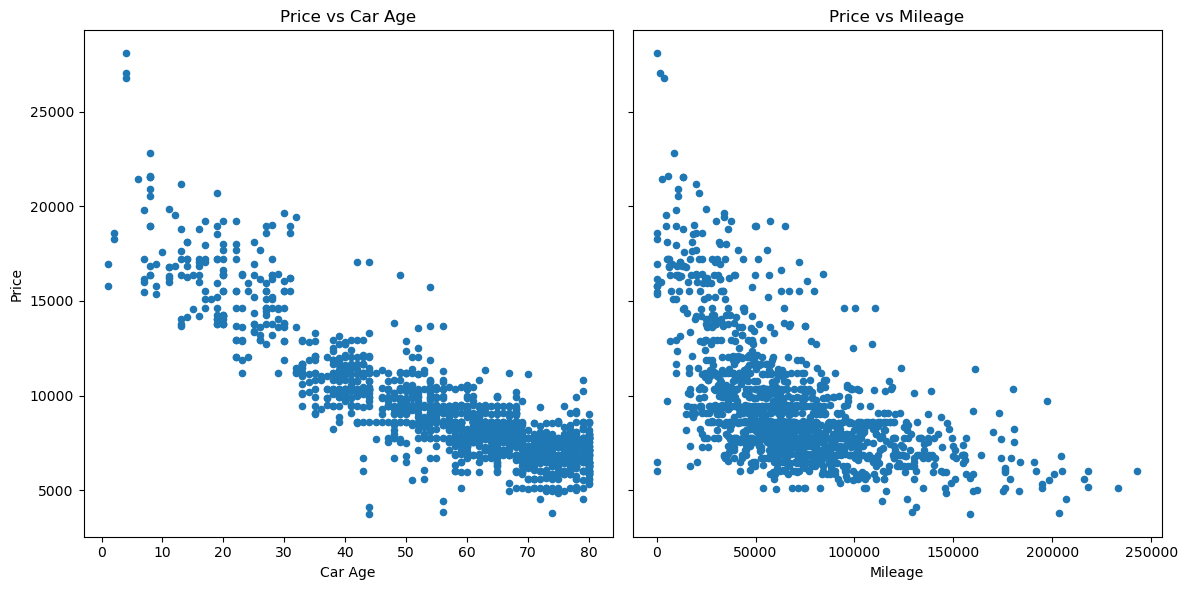

In [16]:
# TODO
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

df.plot.scatter(y='Price', x='Age', title='Price vs Car Age', ylabel='Price', xlabel='Car Age', ax=ax1)
df.plot.scatter(y='Price', x='Mileage', title='Price vs Mileage', ylabel='Price', xlabel='Mileage', ax=ax2)
plt.tight_layout()
plt.show()

#### Comments :

A similar negative trend is observed in both plots. Cars with higher mileage tend to have lower prices, but the relationship appears to have more variability compared to the car age.

For the age study, we can see a distribution that tends more to linearity. We can also observe that most sold cars have between approximately 40 to 80 months.

For the mileage study, we observe lower descreases as the distance grows, its not really linear, it seems that in general a car loses most of its value when reaching approximately 50000km, then its value decreases slowly or even tends towards stagnation.

**1.7 (4 pts): Correlation Between Price and Mileage**

The relationship between car price and mileage appears non-linear, with a steeper price drop initially followed by a flatter curve.

A.(2 pts)  Calculate both the Pearson and Spearman correlations between the price of the car and the distance driven.


In [17]:
# Pearson correlation
pearson_corr = df['Price'].corr(df['Mileage'], method='pearson')
print(f"Pearson correlation between Price and Mileage: {pearson_corr}")

# Spearman correlation
spearman_corr = df['Price'].corr(df['Mileage'], method='spearman')
print(f"Spearman correlation between Price and Mileage: {spearman_corr}")

Pearson correlation between Price and Mileage: -0.5634156654606512
Spearman correlation between Price and Mileage: -0.6053559019304244



B.(2 pts)  Which correlation value is higher? Does this result align with your expectations?

#### Answer :

The Spearman correlation value is higher in magnitude (-0.6012) than the Pearson correlation (-0.5618).

In fact, this aligns with our expectations. The relationship between car price and distance driven appeared to us to be non-linear, with an initial steep decline in price as mileage increases followed by a leveling off. The Pearson correlation measures linear relationships, while the Spearman correlation assesses monotonic relationships (whether it is linear or non-linear).

## Part 2 Linear Regression (30 pts)

You want to build a linear regression model to predict the price of a car based on the features you have.



**2.0 (8 pts) Helper functions**

Before building machine learning models, how to asses performance is crucial. Hence we first implement some helper functions to asses the performance of our model. We can use these later throughout the exercise.

Implement the `accuracy` , `precision`, `recall` and `f1_score` functions with the following requirements:

1. These functions should take in the true labels(`np.array`) and the predicted labels(`np.array`) and return the corresponding metric. 
2. They should follow the convention that the positive class is 1 and the negative class is 0.
3. Apply the functions to the following data:

```python
true_labels = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
predicted_labels = np.array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])
```

Compare the results with the implementation in `sklearn` and see if they match.

In [18]:
# TODO
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# helper functions
def accuracy(true, pred):
    correct = np.sum(true == pred)
    total = len(true)
    return correct / total

def precision(true, pred):
    true_positive = np.sum((pred == 1) & (true == 1))
    predicted_positive = np.sum(pred == 1)
    if predicted_positive == 0:
        return 0
    return true_positive / predicted_positive

def recall(true, pred):
    true_positive = np.sum((pred == 1) & (true == 1))
    actual_positive = np.sum(true == 1)
    if actual_positive == 0:
        return 0
    return true_positive / actual_positive

def f1_score_custom(true, pred):
    prec = precision(true, pred)
    rec = recall(true, pred)
    if (prec + rec) == 0:
        return 0
    return 2 * (prec * rec) / (prec + rec)

# data for testing
true_labels = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0])
predicted_labels = np.array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

custom_accuracy = accuracy(true_labels, predicted_labels)
custom_precision = precision(true_labels, predicted_labels)
custom_recall = recall(true_labels, predicted_labels)
custom_f1 = f1_score_custom(true_labels, predicted_labels)

print("Custom Implementation:")
print(f"Accuracy: {custom_accuracy}")
print(f"Precision: {custom_precision}")
print(f"Recall: {custom_recall}")
print(f"F1 Score: {custom_f1}")

# sklearn metrics to verify
sklearn_accuracy = accuracy_score(true_labels, predicted_labels)
sklearn_precision = precision_score(true_labels, predicted_labels)
sklearn_recall = recall_score(true_labels, predicted_labels)
sklearn_f1 = f1_score(true_labels, predicted_labels)

print("\nSklearn Implementation:")
print(f"Accuracy: {sklearn_accuracy}")
print(f"Precision: {sklearn_precision}")
print(f"Recall: {sklearn_recall}")
print(f"F1 Score: {sklearn_f1}")

Custom Implementation:
Accuracy: 0.7
Precision: 0.6666666666666666
Recall: 0.8
F1 Score: 0.7272727272727272

Sklearn Implementation:
Accuracy: 0.7
Precision: 0.6666666666666666
Recall: 0.8
F1 Score: 0.7272727272727273



**2.1 (6 pts) Preprocess the Data**

To prepare your data for building a linear regression model, complete the following steps:

A.(1 pts) Convert the categorical variables to one-hot encoding using the `pd.get_dummies()` function, how many columns do you have after the one-hot encoding? (P.S. You may want to avoid introducing multicollinearity with one-hot encoding, what should you do to avoid this?)


In [19]:
# TODO
# we first display the number of unique values per column
unique_counts = df.nunique()
print("Unique values per column:")
print(unique_counts)
df.head(5)

Unique values per column:
Price         310
Age            77
Mileage      1263
FuelType        3
HP             12
MetColor        2
Automatic       2
CC             12
Doors           4
Weight         59
dtype: int64


,Price,Age,Mileage,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,12857.0,23,46986.0,Diesel,90,1,0,2000,3,1165
1,11878.0,23,72937.0,Diesel,90,1,0,2000,3,1165
2,12050.0,24,41711.0,Diesel,90,1,0,2000,3,1165
3,12914.0,26,48000.0,Diesel,90,0,0,2000,3,1165
4,11878.0,30,38500.0,Diesel,90,0,0,2000,3,1170


In [20]:
# we define the chosen categorical variables : FuelType'(3 categories), 'MetColor'(2 categories), 'Automatic'(2 categories) and 'Doors'(4 categories)
categorical_vars = ['FuelType', 'MetColor', 'Automatic', 'Doors']
df_encoded = pd.get_dummies(df, columns=categorical_vars, drop_first=True) # we drop to avoid repetitions
num_columns = df_encoded.shape[1]
print(f"Number of columns after one-hot encoding: {num_columns}")
df_encoded.head(5)

Number of columns after one-hot encoding: 13


,Price,Age,Mileage,HP,CC,Weight,FuelType_Diesel,FuelType_Petrol,MetColor_1,Automatic_1,Doors_3,Doors_4,Doors_5
0,12857.0,23,46986.0,90,2000,1165,True,False,True,False,True,False,False
1,11878.0,23,72937.0,90,2000,1165,True,False,True,False,True,False,False
2,12050.0,24,41711.0,90,2000,1165,True,False,True,False,True,False,False
3,12914.0,26,48000.0,90,2000,1165,True,False,False,False,True,False,False
4,11878.0,30,38500.0,90,2000,1170,True,False,False,False,True,False,False


#### Comments :

At first we had 4 categorical variables:
- FuelType: 3 possible outcomes
- MetColor: 2 possible outcomes
- Automatic: 2 possible outcomes
- Doors: 4 possible outcomes

One-hot encoding transforms categorical variables into binary columns. For each unique value in a categorical column, a new column is created, and a 1 is placed in the row if that category applies, otherwise 0. Multicollinearity occurs when one or more features are linearly dependent, which can distort regression coefficients. Indeed, for column MetColor for example, we should not have two columns (metalic, non_metalic) as this would introuduce colinearity in a regression analysis. Indeed, one can know the effect of the dropped variable by regressing on one of the two variables by just looking at the intercept which captures the effect of the dropped variable.
To do so, we use the (drop_first=True) parameter in pd.get_dummies(). This drops one column for each categorical variable, avoiding redundancy while preserving all the information. This way, we would have in total (3-1)+(2-1)+(2-1)+(4-1)=7 columns for  the categorical variables and 6 for the continuous variables which gives a total of 13 columns.

B.(1 pts) Split the data into features (X) and target (y) variables. The target variable is the 'Price' column. Then split the data into train test sets using a 80-20 split. Use `random_state=42` for reproducibility. How many samples are in the training set and how many samples are in the test set?


In [21]:
# TODO
from sklearn.model_selection import train_test_split

# we split into features X and target y
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

# we split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Number of samples in the training set: {X_train.shape[0]}")
print(f"Number of samples in the test set: {X_test.shape[0]}")

Number of samples in the training set: 1148
Number of samples in the test set: 288


C.(1 pts) Why do we split the data into only train-test sets but not train-validation-test sets? 

We do that to first maximize the amount of data available for training and testing as our dataset size is quite limited (1436 samples). And also, since linear regression typically doesn't require extensive hyperparameter tuning, a single train-test split is sufficient to train the model and evaluate its performance.

D.(1 pts) **Standardize the Features**: Use `StandardScaler` from `sklearn.preprocessing` and then add a constant column using `sm.add_constant()`. Print the average and standard deviation of the training set after standardization.

In [22]:
# TODO
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# we fit scaler on training data and transform
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index) # we convert back to a dataframe
X_train_scaled_const = sm.add_constant(X_train_scaled_df)

X_test_scaled = scaler.transform(X_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_train.columns, index=X_test.index)
X_test_scaled_const = sm.add_constant(X_test_scaled_df)


print("Mean of standardized training features:")
print(X_train_scaled_const.mean())
print("\nStandard Deviation of standardized training features:")
print(X_train_scaled_const.std())

X_train_scaled_const.head(5)

Mean of standardized training features:
const              1.000000e+00
Age                1.485455e-16
Mileage           -1.485455e-16
HP                 3.868373e-17
CC                -2.963174e-16
Weight            -6.854757e-16
FuelType_Diesel    1.005777e-17
FuelType_Petrol    2.321024e-17
MetColor_1        -7.736746e-17
Automatic_1        4.642047e-18
Doors_3           -5.570457e-17
Doors_4           -1.315247e-17
Doors_5           -8.665155e-17
dtype: float64

Standard Deviation of standardized training features:
const              0.000000
Age                1.000436
Mileage            1.000436
HP                 1.000436
CC                 1.000436
Weight             1.000436
FuelType_Diesel    1.000436
FuelType_Petrol    1.000436
MetColor_1         1.000436
Automatic_1        1.000436
Doors_3            1.000436
Doors_4            1.000436
Doors_5            1.000436
dtype: float64


,const,Age,Mileage,HP,CC,Weight,FuelType_Diesel,FuelType_Petrol,MetColor_1,Automatic_1,Doors_3,Doors_4,Doors_5
899,1.0,0.329691,-0.254372,-1.027080,-1.409744,-0.745518,-0.357353,0.383214,-1.402287,-0.244987,-0.869110,-0.325535,1.057394
881,1.0,0.649448,-0.194054,0.590140,0.168246,-0.745518,-0.357353,0.383214,0.713121,-0.244987,-0.869110,3.071866,-0.945722
310,1.0,-0.842750,-0.802147,0.590140,0.168246,0.139056,-0.357353,0.383214,0.713121,-0.244987,-0.869110,-0.325535,1.057394
1145,1.0,1.022497,0.875038,0.590140,0.168246,-0.057516,-0.357353,0.383214,0.713121,-0.244987,-0.869110,-0.325535,1.057394
31,1.0,-1.802020,-0.893805,-0.285854,-0.883747,0.532200,-0.357353,0.383214,0.713121,-0.244987,1.150603,-0.325535,-0.945722


#### Comments :

We asked ourselves first why the values of means and stds are not respectively 0 and 1, but then we understood that this is due to the floating-point precision limitations.

E.(2 pts) Should we first standardize the data and then split it into train and test sets or vice versa?   why?


We should first split the data into training and test sets and then standardize the training data, this ensures that scaling parameters are derived solely from the training data, so that we maintain the integrity of the model evaluation and ensure that the test set remains a true unseen dataset.

**2.2 (10 pts) Train and Evaluate the Linear Regression Model**

To train and evaluate a linear regression model using the `statsmodels` library, complete the following steps:

1. (2 pts) Train a linear regression model on the training dataset using `sm.OLS` from `statsmodels`, print the summary of the model using `model.summary()`.


In [23]:
# TODO

model = sm.OLS(y_train, X_train_scaled_const).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     536.0
Date:                Fri, 29 Nov 2024   Prob (F-statistic):               0.00
Time:                        23:00:56   Log-Likelihood:                -9803.5
No. Observations:                1148   AIC:                         1.963e+04
Df Residuals:                    1135   BIC:                         1.970e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            9441.4983     36.725    2

2. (2 pts) Evaluate the model on the test dataset using the square root of the mean squared error (RMSE) metric. 
   1. Report the RMSE value.
   2. Your boss wants to know how far off the model's predictions are from the actual price of the car. What would you tell him? Given a number and explain how you got it.


In [24]:
# TODO
# 1.

from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test_scaled_const) # model's prediction on the test set

# rmse calculation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"RMSE on the test set: {rmse:.2f}")

RMSE on the test set: 1434.34


2. we would tell our boss that the linear regression model's predictions deviate from the actual car prices by an average of 1434.34 CHF. This value is derived from the Root Mean Squared Error (RMSE) metric, which measures the standard deviation of the prediction errors.

3. (2 pts) Report the R² score on the test dataset and interpret it.


In [25]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R² score on the test set: {r2:.2f}")


R² score on the test set: 0.81


#### Comments :

0.81 on the test set indicates that the model explains 81% of the variance in car prices, demonstrating strong predictive performance. We observe that there's only a slight decrease in the R² score compared to the training data, this indicates minimal overfitting.

4.  (2 pts) Which features are statistically significant at a 5% significance level? 

From question 2.2.1, we can see that the features that are statistically significant (with p-value < 0.05) are the following only : 'Age' (p = 0.000), 'Distance' (p = 0.000), 'HP' (p = 0.000), 'CC' (p = 0.000), 'Weight' (p = 0.000), 'FuelType_Diesel' (p = 0.009) and 'FuelType_Petrol' (p = 0.000). These mentionned features have a strong evidence against the null hypothesis, this indicates that they have a meaningful relationship with the target variable 'Price'.


5.  (2 pts) Determine which two feature have the highest coefficient? What does it imply?

From question 2.2.1, the two features that have the ighest coefficient are 'Age' (with a coefficient value of -1971.9732) and 'Weight' (with a coefficient value of 1152.9564).
For the 'Age'', the negative relationship implies that as the age of the car increases (the car gets older), the price decreases. So as we expected, older cars are less valuable.
For the 'Weight', the positive relationship implies that as the weight of the car increases, the price also increases. Our interpretation of that is that heavier cars may be perceived as more robust or feature-rich, which can justify a higher price.

**2.3 (2 pts): Improvement Discussion**

- Suggest a few additional features that could potentially explain this remaining variance in the data ( at least 2 features).

To explain further variance, it is important to choose new variables that are not very corelated with the variables we already have . Variables we think would potentially explain furthermore variance:
- past problems/accidents encountered : the information about any past accidents or significant repairs the car has undergon, cars with no accident history are typically valued higher due to their perceived better structural integrity and reliability;
- the number of past vehicle owners : in fact this feature could alter the price of the car as with few previous owner a car is generally considered better maintained.
- the number of periodic check and maintainance: this shows that the previous owner would take care of his car

**2.4 (2 pts): Identifying Confounding Variables**

The feature "Weight" shows a very low p-value and a high coefficient, but it doesn't seem to be a major factor for customers buying a second-hand car. You go to your mentor Tim to discuss this issue. Indeed, Tim suggests that never in his career has he seen a customer who asked for the weight of a car before buying it.
You suspect that there might be a confounding variable that is correlated with the car's weight and significantly influences its price.

- Suggest a possible confounding variable that may be correlated with the car's weight and significantly influence its price (it doesn't need to be a variable in the dataset). Explain why this variable could be a confounding variable.

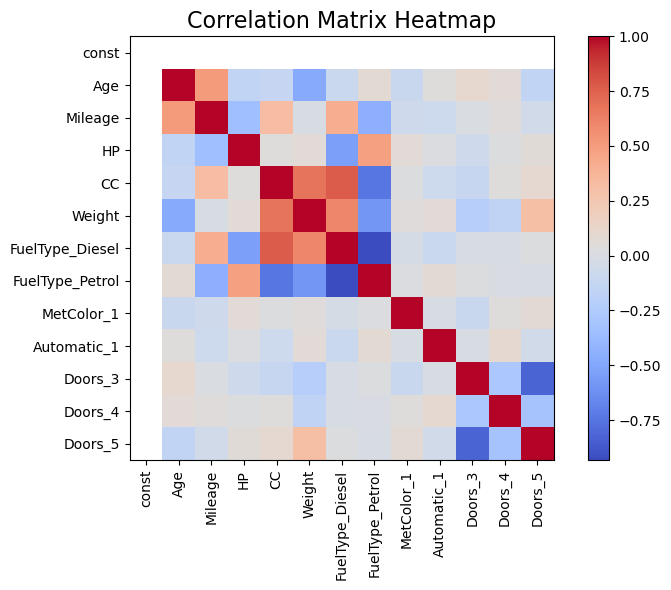

In [26]:
# TODO
# let's plot first the correlation matrix for visualization purposes
corr_matrix = X_train_scaled_const.corr()
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(ticks=np.arange(len(corr_matrix.columns)), labels=corr_matrix.columns, rotation=90)
plt.yticks(ticks=np.arange(len(corr_matrix.columns)), labels=corr_matrix.columns)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

- we observe that the variables with highest correlation with the 'Weight' variable are 'CC' and 'FuelType_Diesel'

- A first suggestion we could think about from the previous results and which seems logical is the Engine's size, represented by 'CC'

- we want now to print the correlation values for the variables for which we observe a higher correlation with the weight, and also the correlation between them


In [27]:
corr_weight_cc = X_train_scaled_const['Weight'].corr(X_train_scaled_const['CC'])
corr_weight_fuel = X_train_scaled_const['Weight'].corr(X_train_scaled_const['FuelType_Diesel'])
corr_cc_fuel = X_train_scaled_const['CC'].corr(X_train_scaled_const['FuelType_Diesel'])
print(f"Correlation between Weight and CC: {corr_weight_cc:.3f}")
print(f"Correlation between Weight and FuelType_Diesel: {corr_weight_fuel:.3f}")
print(f"Correlation between CC and FuelType_Diesel: {corr_cc_fuel:.3f}")

Correlation between Weight and CC: 0.679
Correlation between Weight and FuelType_Diesel: 0.602
Correlation between CC and FuelType_Diesel: 0.771


#### Comments :

From the correlation values derived, we can say that :

- First, we can observe from the previous results (showing a moderate positive correlation) that vehicles with larger engine sizes (higher CC) tend to be heavier, probably due to the increased mass of engine components;
- Second, we can also observe following the same path that vehicles with Diesel fuel type tend to be heavier;
- Third, the CC and FuelType_Diesel show a high positive correlation, which strengthens our previous hypotheses. From that, we could combine them or remove one of them.

From a realistic point of vue, for making their choice, people will generally think more about the kind of fuel the car is made for than its engine size. We know (from general knowledge) that Diesel fuel prices (the price of the fuel, not the car) tend to be lower than Petrol prices (we cite here the more common ones only, namely Diesel and Petrol, the CNG is rare, we can see it in our dataset too).

Hence, a confounding variable could be 'FuelType_Diesel', it makes sense as people generally tend to prefer Diesel engines as the fuel price is lower, so it is sometimes better for long term, and Diesel engines are heavier, which explain our previous concern with the 'Weight' variable.

**2.5 (2 pts): Adding an Inverse Mileage Term**

From the previous scatter plot, the relationship between car price and mileage appears non-linear, with a steep price drop initially and then a flattening. A suitable approach to model this behavior is by incorporating an inverse term of mileage.

- Add the inverse mileage term to the model and retrain it using the code provided. Print the model summary and interpret the effect of the inverse mileage term.
  

In [28]:
# TODO
# take form original unscaled data, then scale and add to X_train_scaled_const
Distance_inv = 1 / X_train['Mileage']
Distance_inv_scaled = scaler.fit_transform(Distance_inv.values.reshape(-1, 1))
X_train_scaled_const['Distance_inv'] = Distance_inv_scaled

# we retrain
model = sm.OLS(y_train, X_train_scaled_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     496.1
Date:                Fri, 29 Nov 2024   Prob (F-statistic):               0.00
Time:                        23:00:56   Log-Likelihood:                -9801.7
No. Observations:                1148   AIC:                         1.963e+04
Df Residuals:                    1134   BIC:                         1.970e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            9441.4983     36.685    2

#### Comments :

Actually, the results we obtained are counter-intuitive to our taste, as we expected a postive relationship but got a negative one. The coefficient is approximatively -70. It says that, holding all other factors constant : as the inverse of mileage increases (which is equivalent to the mileage decreases), the car's price decreases.
This suggests that lower mileage (higher Distance_inv) is associated with slightly lower prices, this goes against the results for the mileage study only (with a coefficient of approximately -512).

As the relation described in our question is hyperbolic and not linear, the results behave differently than in our 'linear scope'. For example from the correlation matrix above we can see that there's almost no correlation between Distance_inv and Distance even if they have a clear perfect mathematical relationship, the thing is that here we measure linear relationships, so having correlation doesn't mean they're not linked!

## Part 3 Supervised Learning (40 pts)


After completing your analysis, you're satisfied with the results. You handed the Jupyter notebook over to your mentor.

(Fun fact: The name "Jupyter" is derived from Julia, Python, and R—three programming languages that the platform was originally designed for.)

Your mentor Tim is very impressed with your work and asks you the following question:

“
This looks great! It will be very useful for our sales team. While looking at the results, I realized that there might be one thing that we can improve. 
For companies like us, it is important to sell the cars quickly. If we are patient, we might be able to sell the car for a higher price, but that’s not always the best strategy. We need to consider the maintenance costs for the car, the cash flow and the fact that the price of the car decreases over time."

He then continues:
"Three months is a sweet spot for us. If we can sell the car within the first three months, it is great. If not, it is worth considering lowering the price to sell it faster and increase our cash flow. I can ask Ivan from Sales to collect data in the last few months on whether the car was sold within the first three months or not. This would be great if you could have a model that tells us if the car will be sold in the first three months or not. "

This sparks your interest, and soon Ivan has provided you with the new data containing an additional column `sold_within_3_months` which is a binary variable indicating whether the car was sold within the first three months or not.

Note: The data for this part is in the file `Task3.ToyotaCorolla_sales_3months.csv` and it has already unified the currency and distance units.

In [29]:
data_df = pd.read_csv('data/Task3.ToyotaCorolla_sales_3months.csv', index_col=0)
data_df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,sold_within_3_months
0,13500,23,46986,Diesel,90,1,0,2000,3,1165,0
1,13750,23,72937,Diesel,90,1,0,2000,3,1165,0
2,13950,24,41711,Diesel,90,1,0,2000,3,1165,0
3,14950,26,48000,Diesel,90,0,0,2000,3,1165,0
4,13750,30,38500,Diesel,90,0,0,2000,3,1170,0



**3.1 (2 pts): Preprocess the Data**
1. （1 pts）How many cars in the dataset were sold in the first three months, and how many were not? 

In [30]:
# TODO
# From now on ftm refers to First Three Months to have more compact variable names
nb_car_ftm = data_df[data_df['sold_within_3_months']==1].shape[0]

print(f"{nb_car_ftm} cars or {100*nb_car_ftm/data_df.shape[0]:.2f}% of the car from our dataset were sold in the first three months")

880 cars or 61.28% of the car from our dataset were sold in the first three months


2. (1 pts) Preprocess the categorical variables to one-hot encoding using the `pd.get_dummies()` function.

In [31]:
# TODO
categorical_vars = ['FuelType', 'MetColor', 'Automatic', 'Doors']
data_df_encoded = pd.get_dummies(data_df, columns=categorical_vars, drop_first=True)
data_df_encoded.head(5)

,Price,Age,KM,HP,CC,Weight,sold_within_3_months,FuelType_Diesel,FuelType_Petrol,MetColor_1,Automatic_1,Doors_3,Doors_4,Doors_5
0,13500,23,46986,90,2000,1165,0,True,False,True,False,True,False,False
1,13750,23,72937,90,2000,1165,0,True,False,True,False,True,False,False
2,13950,24,41711,90,2000,1165,0,True,False,True,False,True,False,False
3,14950,26,48000,90,2000,1165,0,True,False,False,False,True,False,False
4,13750,30,38500,90,2000,1170,0,True,False,False,False,True,False,False


**3.2 (20 pts): Logistic Regression Model**

1. (2 pts) Split the data into features (X) and target (y) variables. The target variable is the 'sold_within_3_months' column. The `Price` column should be included as a feature.

In [32]:
# TODO
# we split the data into features (X) and target (y)
X = data_df_encoded.drop(columns=['sold_within_3_months'])
y = data_df_encoded['sold_within_3_months']

print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())

Features (X):
   Price  Age     KM  HP    CC  Weight  FuelType_Diesel  FuelType_Petrol  \
0  13500   23  46986  90  2000    1165             True            False   
1  13750   23  72937  90  2000    1165             True            False   
2  13950   24  41711  90  2000    1165             True            False   
3  14950   26  48000  90  2000    1165             True            False   
4  13750   30  38500  90  2000    1170             True            False   

   MetColor_1  Automatic_1  Doors_3  Doors_4  Doors_5  
0        True        False     True    False    False  
1        True        False     True    False    False  
2        True        False     True    False    False  
3       False        False     True    False    False  
4       False        False     True    False    False  

Target (y):
0    0
1    0
2    0
3    0
4    0
Name: sold_within_3_months, dtype: int64


2. (2 pts) Then split the data into train test sets using a 80-20 split. Use `random_state=42` for reproducibility. 

In [33]:
# TODO
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. (2 pts) Standardize the features using `StandardScaler` from `sklearn.preprocessing` and then add a constant column using `sm.add_constant()`.

In [34]:
# TODO
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# we convert back to dataframes
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index) 
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

X_train_scaled_const = sm.add_constant(X_train_scaled_df)
X_test_scaled_const = sm.add_constant(X_test_scaled_df)

X_train_scaled_const.head(5)

,const,Price,Age,KM,HP,CC,Weight,FuelType_Diesel,FuelType_Petrol,MetColor_1,Automatic_1,Doors_3,Doors_4,Doors_5
899,1.0,-0.346662,0.329691,-0.254372,-1.027080,-1.409744,-0.745518,-0.357353,0.383214,-1.402287,-0.244987,-0.869110,-0.325535,1.057394
881,1.0,-0.265137,0.649448,-0.194054,0.590140,0.168246,-0.745518,-0.357353,0.383214,0.713121,-0.244987,-0.869110,3.071866,-0.945722
310,1.0,0.606773,-0.842750,-0.802147,0.590140,0.168246,0.139056,-0.357353,0.383214,0.713121,-0.244987,-0.869110,-0.325535,1.057394
1145,1.0,-1.189554,1.022497,0.875038,0.590140,0.168246,-0.057516,-0.357353,0.383214,0.713121,-0.244987,-0.869110,-0.325535,1.057394
31,1.0,1.380576,-1.802020,-0.893805,-0.285854,-0.883747,0.532200,-0.357353,0.383214,0.713121,-0.244987,1.150603,-0.325535,-0.945722


4. (2 pts) Fit a logistic regression model on the training dataset.

In [35]:
# TODO
logit_model = sm.Logit(y_train, X_train_scaled_const).fit()
print(logit_model.summary())

         Current function value: 0.165914
         Iterations: 35
                            Logit Regression Results                            
Dep. Variable:     sold_within_3_months   No. Observations:                 1148
Model:                            Logit   Df Residuals:                     1134
Method:                             MLE   Df Model:                           13
Date:                  Fri, 29 Nov 2024   Pseudo R-squ.:                  0.7511
Time:                          23:00:57   Log-Likelihood:                -190.47
converged:                        False   LL-Null:                       -765.10
Covariance Type:              nonrobust   LLR p-value:                1.448e-237
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.3510     32.375     -0.011      0.991     -63.805      63.103
Price              -9.9849      0.

c:\Users\Yass La Menace\anaconda3\envs\ada\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


5. (2 pts) Evaluate the model on the test dataset using the accuracy score metric. Report the accuracy score.

In [36]:
# TODO
y_pred_prob = logit_model.predict(X_test_scaled_const)
y_pred = (y_pred_prob >= 0.5).astype(int) # we convert probabilities to binary class predictions (threshold = 0.5)

# using the helper function we previously coded in Part 1
accuracy_sc = accuracy(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy_sc:.3f}")

Accuracy on the test set: 0.931


6. (2 pts) Calculate the precision, recall, and F1-score.

In [37]:
# TODO
# using the helper functions we previously coded in Part 1

precision_sc = precision(y_test, y_pred)
recall_sc = recall(y_test, y_pred)
f1_sc = f1_score_custom(y_test, y_pred)

# Print the results
print(f"Precision: {precision_sc:.3f}")
print(f"Recall: {recall_sc:.3f}")
print(f"F1-score: {f1_sc:.3f}")

Precision: 0.938
Recall: 0.948
F1-score: 0.943



7. (2 pts) Suppose that your company is running short on cash flow and needs to sell the cars quickly. How should you adjust the threshold for the logistic regression model to ensure that the company can sell the cars as quickly as possible?
    - A. Increase the threshold
    - B. Decrease the threshold

In a more general sense, how does the choice of threshold affect the precision and recall of the model?

--> We will first explain and see what happens in both scenarios, and then justify our choice :

When we *increase the threshold* (A.), our decision is more 'strict', the *number of predicted positives is less important* then, potentially missing true positives and thus *decreasing recall. But with fewer positive predictions, the proportion of correct positive predictions rises, thereby **increasing precision*.

In [38]:
# TODO
y_pred_A = (y_pred_prob >= 0.85).astype(int)
precision_sc_A = precision(y_test, y_pred_A)
recall_sc_A = recall(y_test, y_pred_A)
print(f"Precision: {precision_sc_A:.3f}")
print(f"Recall: {recall_sc_A:.3f}")

Precision: 0.968
Recall: 0.856


When we *decrease the threshold* (B.), our decision is less 'strict' on the predictions, *more instances are predicted as positive, so more true positives are captured, thereby **increasing recall. But with more predictions labeled as positive, there's a higher chance of including false positives (instances incorrectly labeled as positive) which **decreases precision*.

In [39]:
y_pred_B = (y_pred_prob >= 0.25).astype(int)
precision_sc_B = precision(y_test, y_pred_B)
recall_sc_B = recall(y_test, y_pred_B)
print(f"Precision: {precision_sc_B:.3f}")
print(f"Recall: {recall_sc_B:.3f}")

Precision: 0.874
Recall: 1.000


By *decreasing the threshold*, the company prioritizes recall, ensuring that a larger proportion of cars that can be sold quickly are identified and acted upon. This strategic adjustment aligns with the immediate business need to enhance cash flow through faster sales, despite the trade-off of reduced precision.

*So we choose option B.*

8. (6 pts) Use binary search to find the optimal threshold that maximizes the F1-score. Implement a binary search algorithm to find the threshold that maximizes the f1-score of the logistic regression model on the training set. The search interval should be between 0 and 1, and the stopping criterion is 10 iterations.  What is the optimal threshold and what difference does the optimal threshold make in the F1-score?

In [41]:
y_train_pred_prob = logit_model.predict(X_train_scaled_const)

iterations = 10
low = 0.0
high = 1.0
best_threshold = None
best_f1 = -1

# binary search with 10 iterations
for it in range(iterations):
    mid = (low + high) / 2.0
    
    # F1-score at mid threshold
    y_pred_mid = (y_train_pred_prob >= mid).astype(int)
    f1_mid = f1_score_custom(y_train, y_pred_mid)
    
    # F1-score slightly left and right of mid
    delta = (high - low) / 4.0
    left = max(low, mid - delta)
    right = min(high, mid + delta)
    
    y_pred_left = (y_train_pred_prob >= left).astype(int)
    f1_left = f1_score_custom(y_train, y_pred_left)
    
    y_pred_right = (y_train_pred_prob >= right).astype(int)
    f1_right = f1_score_custom(y_train, y_pred_right)
    
    print(f'iteration : {it}\n')
    print("mid thshld :")
    print(mid)
    print("f1_mid :")
    print(f1_mid)
    print("left thshld :")
    print(left)
    print("left f1 :")
    print(f1_left)
    print("right thshld :")
    print(right)
    print("right f1 :")
    print(f1_right)
    print('\n')
    
    # we update to the best threshold if necessary
    if f1_left > best_f1:
        best_f1 = f1_left
        best_threshold = left
    if f1_mid > best_f1:
        best_f1 = f1_mid
        best_threshold = mid
    if f1_right > best_f1:
        best_f1 = f1_right
        best_threshold = right
    
    # we decide which side to explore next
    if f1_left > f1_mid:
        high = mid
    elif f1_right > f1_mid:
        low = mid
    else:
        low = left
        high = right

# Output the optimal threshold and corresponding F1-score
print(f"Optimal threshold: {best_threshold}")
print(f"Optimal F1-score on training set: {best_f1:.4f}")

iteration : 0

mid thshld :
0.5
f1_mid :
0.9456598447424135
left thshld :
0.25
left f1 :
0.9327956989247311
right thshld :
0.75
right f1 :
0.9325513196480938


iteration : 1

mid thshld :
0.5
f1_mid :
0.9456598447424135
left thshld :
0.375
left f1 :
0.9400413507925569
right thshld :
0.625
right f1 :
0.93974175035868


iteration : 2

mid thshld :
0.5
f1_mid :
0.9456598447424135
left thshld :
0.4375
left f1 :
0.9415855354659248
right thshld :
0.5625
right f1 :
0.9431818181818181


iteration : 3

mid thshld :
0.5
f1_mid :
0.9456598447424135
left thshld :
0.46875
left f1 :
0.9453015427769986
right thshld :
0.53125
right f1 :
0.9462517680339463


iteration : 4

mid thshld :
0.53125
f1_mid :
0.9462517680339463
left thshld :
0.515625
left f1 :
0.9462517680339463
right thshld :
0.546875
right f1 :
0.9461756373937678


iteration : 5

mid thshld :
0.53125
f1_mid :
0.9462517680339463
left thshld :
0.5234375
left f1 :
0.9462517680339463
right thshld :
0.5390625
right f1 :
0.9455060155697098


iter

#### Comments :

By implementing a binary search to optimize the threshold, we achieved a slight improvement in the F1-score from 0.9457 (with a thershold of 0.5) to 0.9463 (with a thershold of 0.53125). This is not a big difference, but still enhances the model's balance between precision and recall, although marginally.

**3.3(18 pts) Decision Tree Model**

Use a Decision Tree model from `sklearn` to predict whether a car will be sold within the first three months.

Follow these steps to complete the task:

1. (2 pts) Train a Decision Tree Classifier to predict the target variable (`sold_within_3_months`).You can reuse the train and test sets from the previous section. Set `random_state=42` for reproducibility in `DecisionTreeClassifier`.

In [42]:
# TODO
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

2. (2 pts) Evaluate the model on the test set and report the depth of the tree.

In [43]:
# TODO  
y_pred_dt = dt_classifier.predict(X_test)

accuracy_dt = accuracy(y_test, y_pred_dt)
recall_dt = recall(y_test, y_pred_dt)
precision_dt = precision(y_test, y_pred_dt)
f1_score_dt = f1_score_custom(y_test, y_pred_dt)
tree_depth = dt_classifier.get_depth()

print(f"Accuracy on the test set: {accuracy_dt:.2f}")
print(f"Recall on the test set: {recall_dt:.2f}")
print(f"Precision on the test set: {precision_dt:.2f}")
print(f"F1-score on the test set: {f1_score_dt:.2f}\n")
print(f"Depth of the Decision Tree: {tree_depth}")

Accuracy on the test set: 0.92
Recall on the test set: 0.95
Precision on the test set: 0.92
F1-score on the test set: 0.93

Depth of the Decision Tree: 16


3. (2 pts) Visualize the Decision Tree

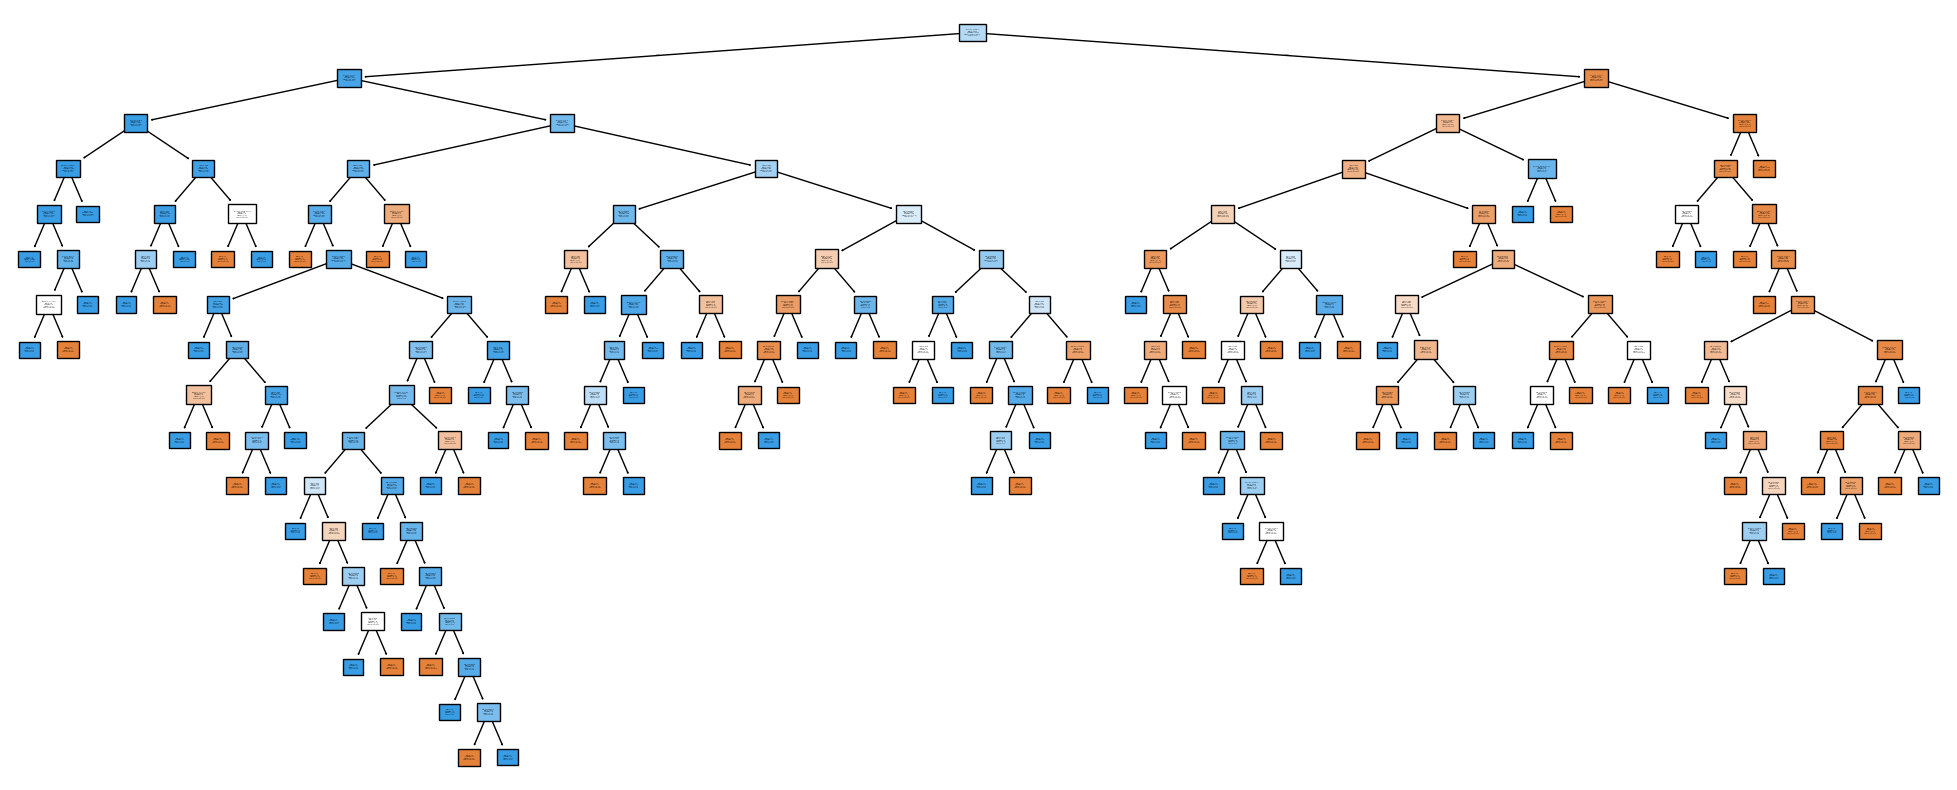

In [44]:
# TODO
from sklearn.tree import plot_tree

plt.figure(figsize=(25, 10))
plot_tree(dt_classifier, feature_names=X_train.columns, class_names=['Not Sold', 'Sold'], filled=True, fontsize=1)
plt.show()

4. (2 pts) Retrain the Decision Tree Classifier with a maximum depth of 8 and evaluate it on the test set. Compare and explain the results.

In [45]:
# TODO
dt_classifier_depth8 = DecisionTreeClassifier(max_depth=8, random_state=42)

dt_classifier_depth8.fit(X_train, y_train)

# prediction
y_pred_depth8 = dt_classifier_depth8.predict(X_test)

# evaluation
accuracy_depth8 = accuracy(y_test, y_pred_depth8)
recall_depth8 = recall(y_test, y_pred_depth8)
precision_depth8 = precision(y_test, y_pred_depth8)
f1_score_depth8 = f1_score_custom(y_test, y_pred_depth8)

# Get the depth of the tree
tree_depth8 = dt_classifier_depth8.get_depth()

# Print the results
print(f"Accuracy on the test set with max_depth=8: {accuracy_depth8:.2f}")
print(f"Recall on the test set with max_depth=8: {recall_depth8:.2f}")
print(f"Precision on the test set with max_depth=8: {precision_depth8:.2f}")
print(f"F1_score on the test set with max_depth=8: {f1_score_depth8:.2f}\n")

print(f"Depth of the Decision Tree: {tree_depth8}")

Accuracy on the test set with max_depth=8: 0.92
Recall on the test set with max_depth=8: 0.96
Precision on the test set with max_depth=8: 0.91
F1_score on the test set with max_depth=8: 0.94

Depth of the Decision Tree: 8


#### Comments :

This adjustment resulted in a simpler model that generalizes slightly better to unseen data (slightly better accuracy and recall, negligeable decline in precision, approximately same F1-score), it offers a *better balance between model simplicity and predictive performance*.

5. (6 pts) Train a Decision Tree Classifier for each depth from 1 to D where D is the maximum depth of the Decision Tree Classifier seen in the previous step. Evaluate each model on the test set and plot the accuracy of the models as a function of the depth and find the optimal depth.


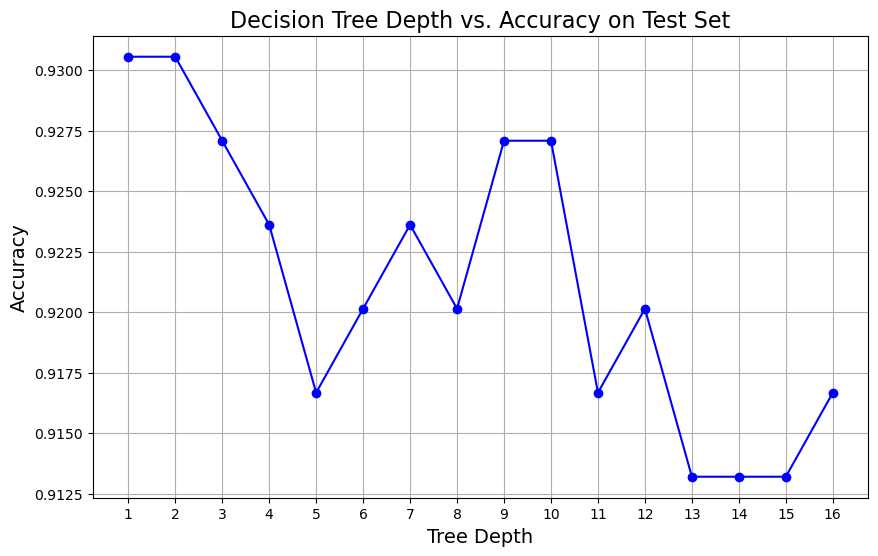

Optimal Depth: 1
Highest Accuracy on Test Set: 0.93


In [46]:
# TODO
tree_depth

# we define the maximum depth based on previous step (tree_depth=16)
D = tree_depth

# lists to store dephts and accuracies
depths = list(range(1, D + 1))
accuracies = []

for depth in depths:
    
    dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_classifier.fit(X_train, y_train)
    y_pred = dt_classifier.predict(X_test)
    
    # we calculate accuracy and append to the list
    accuracy_d = accuracy(y_test, y_pred)
    accuracies.append(accuracy_d)

# we plot the dephts vs accuracies
plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, marker='o', linestyle='-', color='b')
plt.title('Decision Tree Depth vs. Accuracy on Test Set', fontsize=16)
plt.xlabel('Tree Depth', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(depths)
plt.grid(True)
plt.show()

# we search for the optimal depth (the one with highest accuracy)
optimal_depth = depths[accuracies.index(max(accuracies))]
optimal_accuracy = max(accuracies)

print(f"Optimal Depth: {optimal_depth}")
print(f"Highest Accuracy on Test Set: {optimal_accuracy:.2f}")

--> Both 1 and 2 are optimal depths regarding the accuracy metric, we choose the simplest so depth = 1

6. (4 pts) Train a decision tree of depth = 1 , visualize the tree and explain what is the decision rule at the root node.

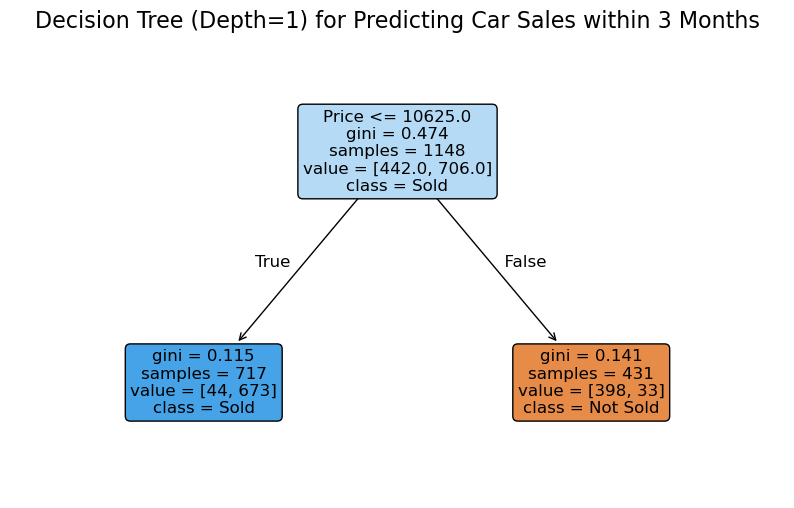

In [47]:
# TODO

dt_classifier_depth1 = DecisionTreeClassifier(max_depth=1, random_state=42)
dt_classifier_depth1.fit(X_train, y_train)

plt.figure(figsize=(10, 6))
plot_tree(dt_classifier_depth1, feature_names=X_train.columns, class_names=['Not Sold', 'Sold'], filled=True, rounded=True, fontsize=12)
plt.title("Decision Tree (Depth=1) for Predicting Car Sales within 3 Months", fontsize=16)
plt.show()

#### Comments :

The decision rule at the root node states the following : 

*If Price ≤ 10,625.0*,

predict *Sold*; 

*otherwise*, 

predict *Not Sold*.

--> This implies that cars priced below or equal to 10,625.0 are more likely to be sold within three months while cars priced above 10,625.0 are more likely to remain unsold within three months.

## Part 4 Propensity Score Matching (10 pts)

Your mentor is thrilled with the progress, and he has asked Ivan to put the model into production. Based on the model's prediction, the sales manager Ivan will decide whether to lower the car's price by 5%.

A new quarter has passed, and Ivan has collected updated sales data, which includes the following columns:

- `Price`: The initial price of the car.
- `Pred_Prob`: The predicted probability of the car being sold within the first three months.
- `Applied_Discount`: Whether the discount was applied (Yes=1, No=0).
- `Discounted_Price`: The car's final price, calculated as `Price * 95%` if the discount was applied; otherwise, it's equal to `Price`.
- `Sold_within_3_months`: Whether the car was sold within the first three months (Yes=1, No=0).

Your task is to estimate the causal effect of the discount on sales within the first three months using propensity score matching.

In [48]:
data_df = pd.read_csv('data/Task4.ToyotaCorolla_discount_sales.csv', index_col=0)
print(data_df.head())

   Price  Pred_Prob  Applied_Discount  Discounted_Price  Sold_within_3_months
0  12750       0.01                 1           11475.0                     1
1  21950       0.00                 1           19755.0                     1
2   9950       0.79                 0            9950.0                     1
3   9930       0.91                 1            8937.0                     0
4   9450       0.97                 0            9450.0                     0


**4.1 (1 pts): How many samples are in the treated group, and how many are in the control group?**

In [49]:
# TODO
treated_count = data_df[data_df['Applied_Discount'] == 1].shape[0]
control_count = data_df[data_df['Applied_Discount'] == 0].shape[0]

print(f"Treated group (discount applied): {treated_count}")
print(f"Control group (no discount applied): {control_count}")

Treated group (discount applied): 82
Control group (no discount applied): 118



**4.2 (5 pts): Propensity Score Matching**
- The propensity score is the predicted probability of the car being sold within the first three months from the logistic regression model, i.e. `Pred_Prob` column in the `Task4.ToyotaCorolla_discount_sales.csv` file. Create pairs of matched samples as follows:
  - For each treated sample (discount applied), find a control sample (discount not applied) with a difference in propensity score of less than 0.05.
  - If there is more than one control sample for a treated sample, choose the control sample with the smallest difference in propensity score.
  - If there is no control sample satisfying the condition, discard the treated sample.
  - How many successful matches did you get?

Notice that your output should be 1-to-1 matching, meaning that each treated sample should be matched with at most one control sample.
So each sample can only appear once in the pairs.

In [50]:
# TODO
treated = data_df[data_df['Applied_Discount'] == 1].copy()
control = data_df[data_df['Applied_Discount'] == 0].copy()

matches = [] # to store matches

# we iterate over treated samples
for _, treated_row in treated.iterrows():
    
    treated_prob = treated_row['Pred_Prob']
    potential_matches = control[np.abs(control['Pred_Prob'] - treated_prob) < 0.05]
    
    if not potential_matches.empty:
        best_match_idx = (np.abs(potential_matches['Pred_Prob'] - treated_prob)).idxmin()
        matches.append((treated_row.name, best_match_idx))
        # here we remove the matched control sample to ensure 1-to-1 matching
        control = control.drop(index=best_match_idx)

successful_matches = len(matches)
print(f"Number of successful matches: {successful_matches}")

Number of successful matches: 49


**4.3 (4 pts): Average Treatment Effect (ATE)**

Now let's estimate the effect of the discount on sales. 

For each matched pair, there is one treated sample and one control sample. They may have different outcomes and we can calculate the average treatment effect (ATE) as 

$$ ATE = \frac{1}{N} \sum_i^N  y_{treat}^{(i)} - y_{\\control}^{(i)} $$ 

where $y_{treat}^{(i)}$ and $y_{\\control}^{(i)}$ are the outcomes for the treated and control samples, respectively.

Notice that here the outcome is a simple binary variable, which is whether the car was sold within the first three months or not.

1. (3 pts) Calculate the ATE based on the matched pairs and report the result



In [51]:
# TODO
treated_outcomes = []
control_outcomes = []

for treated_idx, control_idx in matches:
    y_treat = data_df.loc[treated_idx, 'Sold_within_3_months']
    y_control = data_df.loc[control_idx, 'Sold_within_3_months']
    
    treated_outcomes.append(y_treat)
    control_outcomes.append(y_control)

# we convert to NumPy arrays for easy computation
treated_outcomes = np.array(treated_outcomes)
control_outcomes = np.array(control_outcomes)

ate = np.mean(treated_outcomes - control_outcomes)
print(f"Average Treatment Effect (ATE): {ate:.4f}")

Average Treatment Effect (ATE): 0.3878


2. (1 pts) What is your conclusion about the effect of the discount on sales within the first three months?

The Average Treatment Effect (ATE) is 0.3878, meaning that applying the discount increases the likelihood of selling a car within the first three months by approximately 38.78% on average compared to not applying the discount! So the discount has a positive effect on sales within the first three months, and reducing the price by 5% is a strategy that works for increasing sales within the desired time frame.